In [2]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


## Loading Age/Gender/Emotion Models

In [3]:
export_dir='age_model.h5'
age_model = load_model(export_dir)

# summarize model.
age_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (Average  (None, 99, 99, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 48, 48, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Avera  (None, 23, 23, 128)       

In [4]:
# load and evaluate a saved model
export_dir='gender_model.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 70)        700       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 65)        41015     
                                                                 
 batch_normalization (Batch  (None, 96, 96, 65)        260       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 65)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 60)        35160

In [5]:
export_dir='emotion_model.h5'
emotion_model = load_model(export_dir)

# summarize model.
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [6]:
# Labels on Age, Gender and Emotion to be predicted

age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']
emotion_ranges= ['Positive','Negative','Neutral']

## Loading Test Images

In [7]:
# img_path = "priyanka_chopra.jpg"
# img_path = "kartik_aryan.jpg"
# img_path = "family.jpg"
img_path='000.JPEG'

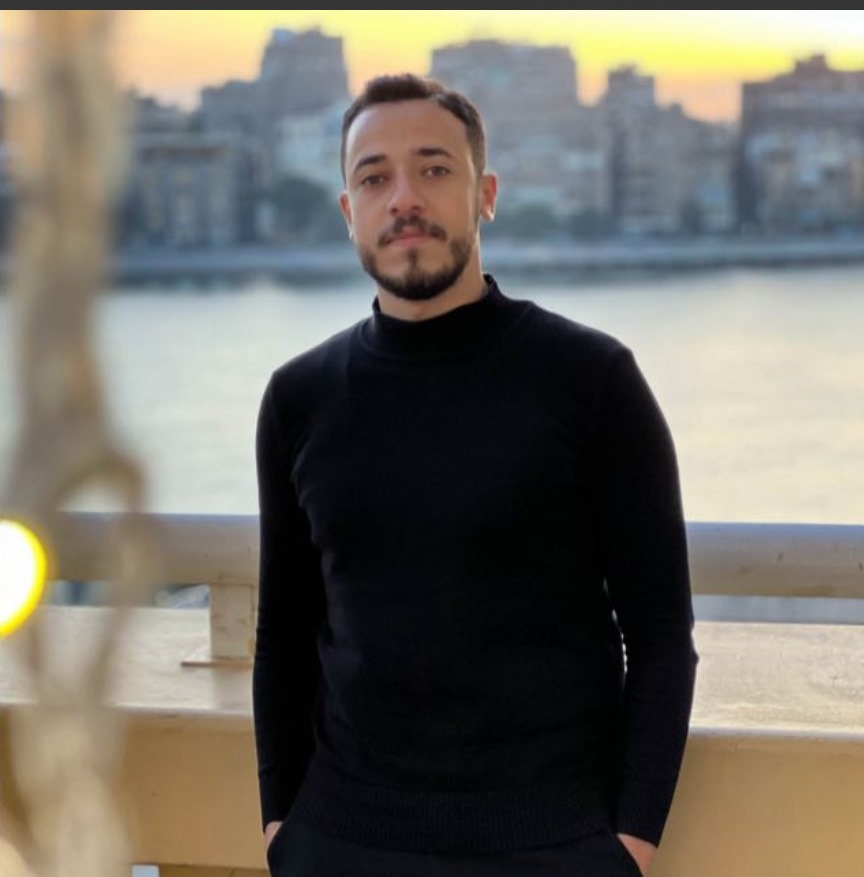

In [8]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

## Results on Age/Gender/Emotion

1/1 [==============================] - 0s 184ms/step
1: male, 28-45, Positive


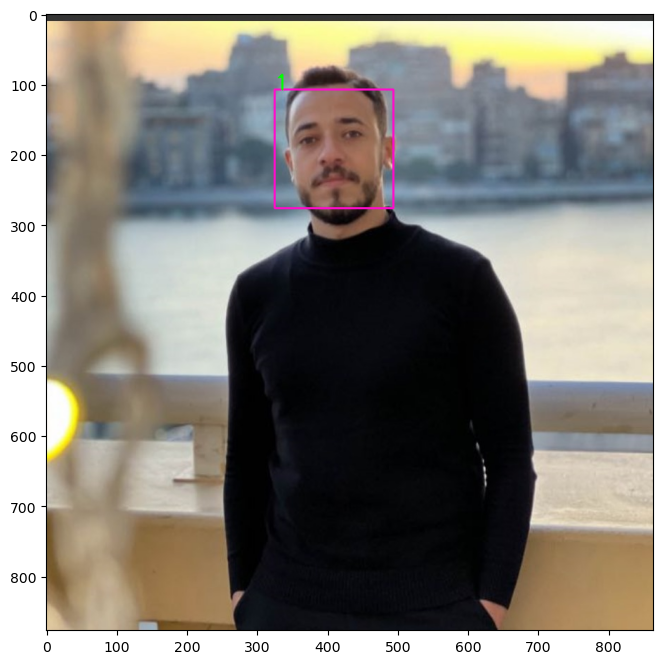

In [9]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [10]:
cap = cv2.VideoCapture(0)  # Use 0 for the webcam, or replace with video file path

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (203, 12, 255), 2)

        # Extract face region
        img_gray = gray[y:y + h, x:x + w]

        # Emotion prediction
        emotion_img = cv2.resize(img_gray, (48, 48), interpolation=cv2.INTER_AREA)
        emotion_image_array = np.array(emotion_img)
        emotion_input = np.expand_dims(emotion_image_array, axis=0)
        output_emotion = emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

        # Gender prediction
        gender_img = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)
        gender_image_array = np.array(gender_img)
        gender_input = np.expand_dims(gender_image_array, axis=0)
        output_gender = gender_ranges[np.argmax(gender_model.predict(gender_input))]

        # Age prediction
        age_img = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
        age_input = age_img.reshape(-1, 200, 200, 1)
        output_age = age_ranges[np.argmax(age_model.predict(age_input))]

        # Display results
        output_str = f"{output_gender}, {output_age}, {output_emotion}"
        cv2.putText(frame, output_str, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show the frame with annotations
    cv2.imshow('Video', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 55ms/step
